# Lab 1: Normality Testing

## Part 1
For this lab we'll test the normality of the Iris dataset columns. For each column in the Iris dataset, test the assumption of a normal distribution using the methods we learned about in the walkthrough. 

In [21]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, 
                      columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

In [22]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Visualizations

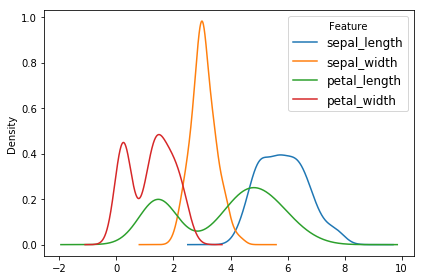

In [49]:
# Histogram for each column
for col in iris_df.columns:
    
    # Draw the plot
    iris_df[col].plot(kind='density')
    
    # Title and labels
    ax.set_title('Iris Petal and Width Distribution')

plt.tight_layout()
plt.legend(prop={'size': 12}, title = 'Feature')
plt.show()

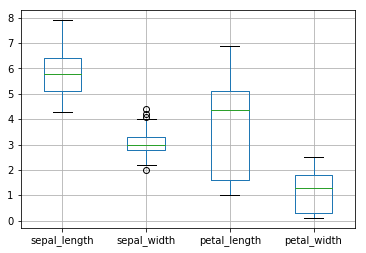

In [50]:
iris_df.boxplot()

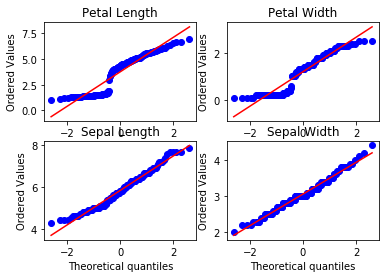

In [103]:
import scipy.stats as stats

fig = plt.figure()
ax = fig.add_subplot(221)
stats.probplot(iris_df.petal_length, dist="norm", plot=plt)
ax.set_title("Petal Length")

ax = fig.add_subplot(222)
stats.probplot(iris_df.petal_width, dist="norm", plot=plt)
ax.set_title("Petal Width")

ax = fig.add_subplot(223)
stats.probplot(iris_df.sepal_length, dist="norm", plot=plt)
ax.set_title("Sepal Length")

ax = fig.add_subplot(224)
stats.probplot(iris_df.sepal_width, dist="norm", plot=plt)
ax.set_title("Sepal Width")

plt.show()






## Statistical Metrics

### Shapiro Wilk

In [104]:
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(iris_df.petal_length)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.8762688040733337, Pvalue= 7.412849778454245e-10
Sample does not look Gaussian (reject H0)


In [105]:
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(iris_df.petal_width)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9018339514732361, Pvalue= 1.6802413682626138e-08
Sample does not look Gaussian (reject H0)


In [106]:
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(iris_df.sepal_length)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9760897755622864, Pvalue= 0.01017984002828598
Sample does not look Gaussian (reject H0)


In [107]:
from scipy.stats import shapiro

# run shapiro test and return the test stat and p value
W_stat, p = shapiro(iris_df.sepal_width)
print("W-statistic= {}, Pvalue= {}".format(W_stat, p))

# interpret the results
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

W-statistic= 0.9849170446395874, Pvalue= 0.10113201290369034
Sample looks Gaussian (fail to reject H0)


### D'agostino's K Squared

In [108]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(iris_df.petal_width)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 137.55596543193647, Pvalue= 1.3492785927137586e-30
Sample does not look Gaussian (reject H0)


In [109]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(iris_df.petal_length)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 221.68729405585384, Pvalue= 7.264667501338673e-49
Sample does not look Gaussian (reject H0)


In [110]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(iris_df.sepal_width)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 3.1238322481520377, Pvalue= 0.2097338099298262
Sample looks Gaussian (fail to reject H0)


In [111]:
from scipy.stats import normaltest

# normality test
k2_stat, p = normaltest(iris_df.sepal_length)
print('K^2 Stat= {}, Pvalue= {}'.format(k2_stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

K^2 Stat= 5.735584236235733, Pvalue= 0.05682424941067306
Sample looks Gaussian (fail to reject H0)


### Anderson Darling

In [112]:
from scipy.stats import anderson

# anderson test
result = anderson(iris_df.sepal_length)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 0.8891994860134105
Significance: 15.0 
 Pval cutoff: 0.562 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.64 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.767 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.895 - Data looks normal (fail to reject H0)
Significance: 1.0 
 Pval cutoff: 1.065 - Data looks normal (fail to reject H0)


In [113]:
from scipy.stats import anderson

# anderson test
result = anderson(iris_df.sepal_width)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 0.9079550471145126
Significance: 15.0 
 Pval cutoff: 0.562 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.64 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.767 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.895 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.065 - Data looks normal (fail to reject H0)


In [114]:
from scipy.stats import anderson

# anderson test
result = anderson(iris_df.petal_length)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 7.6785455198266845
Significance: 15.0 
 Pval cutoff: 0.562 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.64 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.767 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.895 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.065 - Data does not look normal (reject H0)


In [115]:
from scipy.stats import anderson

# anderson test
result = anderson(iris_df.petal_width)

print('Test Statistic: {}'.format(result.statistic))

p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('Significance: {} \n Pval cutoff: {} - Data looks normal (fail to reject H0)'.format(sl, cv))
    else:
        print('Significance: {} \n Pval cutoff: {} - Data does not look normal (reject H0)'.format(sl, cv))

Test Statistic: 5.1056620354169695
Significance: 15.0 
 Pval cutoff: 0.562 - Data does not look normal (reject H0)
Significance: 10.0 
 Pval cutoff: 0.64 - Data does not look normal (reject H0)
Significance: 5.0 
 Pval cutoff: 0.767 - Data does not look normal (reject H0)
Significance: 2.5 
 Pval cutoff: 0.895 - Data does not look normal (reject H0)
Significance: 1.0 
 Pval cutoff: 1.065 - Data does not look normal (reject H0)


## Part 2 - Summarize your results
Based on the tests above, summarize your results and support your conclusions with evidence from your testing. 

In [116]:
iris_df.petal_length.mean()

3.7580000000000027

In [120]:
iris_df.petal_length.std()

1.7652982332594667

In [117]:
iris_df.petal_width.mean()

1.199333333333334

In [121]:
iris_df.petal_width.std()

0.7622376689603465

In [118]:
iris_df.sepal_length.mean()

5.843333333333335

In [122]:
iris_df.sepal_length.std()

0.8280661279778629

In [119]:
iris_df.sepal_width.mean()

3.057333333333334

In [123]:
iris_df.sepal_width.std()

0.435866284936698